In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] =(12,8) # Adjusts the configuration of the plots we wil create


pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)


# Read in the data

df= pd.read_csv("movies.csv")

In [6]:
# Let's look at the data

print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [7]:
# Let's look if there is any missing data
for col in df.columns:
   print(df[col].isnull().value_counts(), "\n")

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



In [8]:
#Drop the null values

df = df.dropna(how='any',axis=0)

In [9]:
# Data types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
#change the data types of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [11]:
#Create a new column with the correct year
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [12]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
#drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

print(df)

                                            name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5445  December

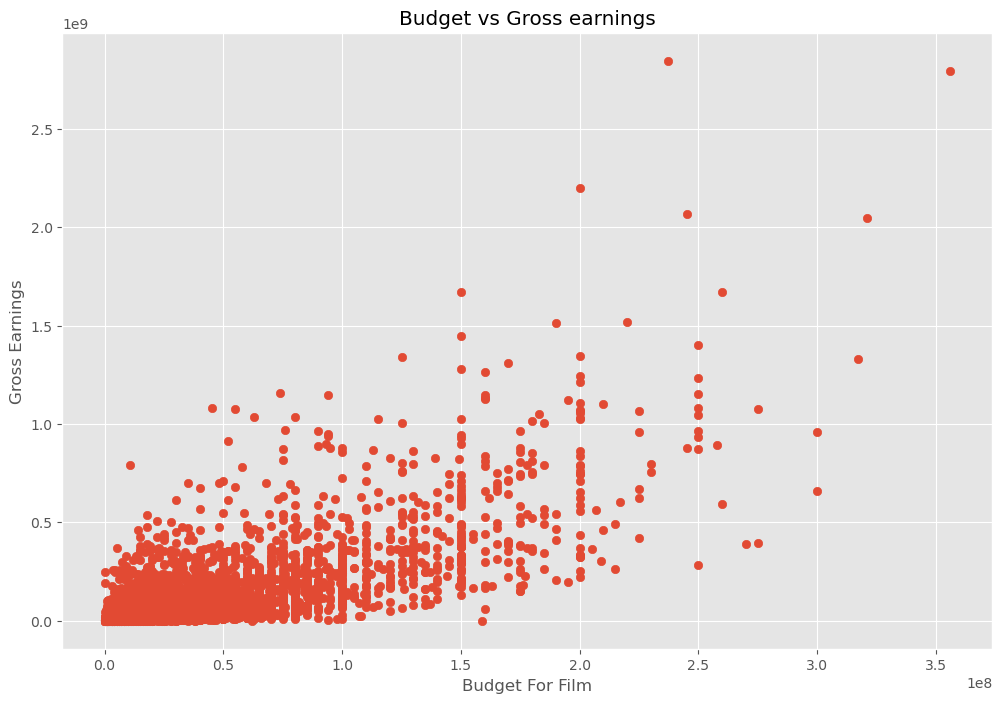

In [14]:
# Scatter Plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

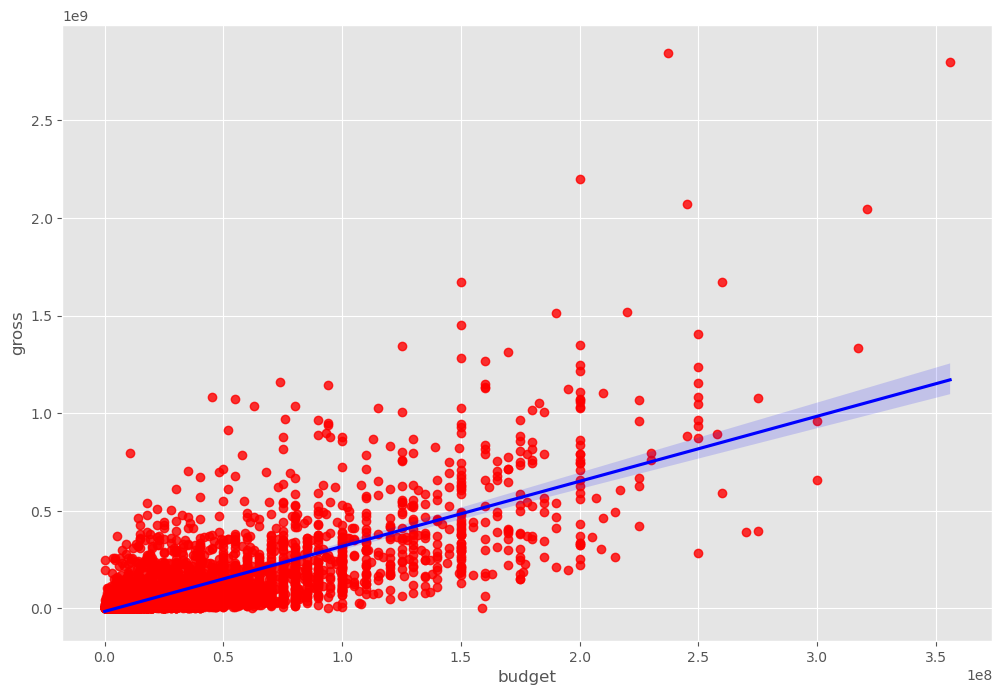

In [15]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.show()

In [16]:
# Let's start looking at correlation

print(df.corr(method='pearson'))

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


In [17]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [18]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


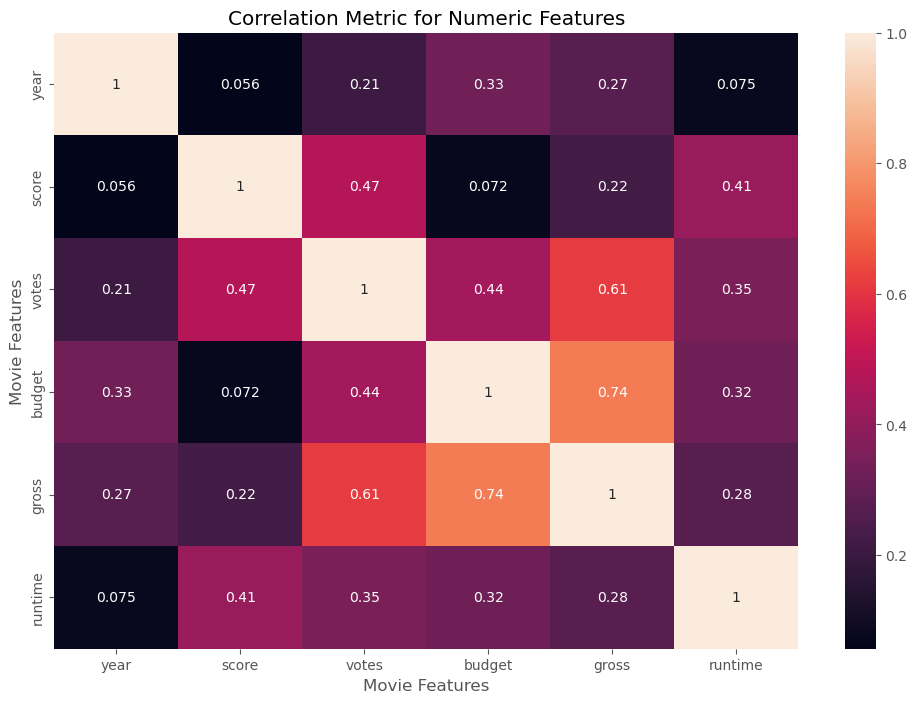

In [19]:
correlation_metrix = df.corr(method='pearson')
sns.heatmap(correlation_metrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
# Look at company
df_numerized = df
for col_name in df_numerized.columns:
   if(df_numerized[col_name].dtype == 'object'):
      df_numerized[col_name] = df_numerized[col_name].astype('category')
      df_numerized[col_name] = df_numerized[col_name].cat.codes
print(df_numerized)

      name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
5640  3794       6      6  2009       890    5.8     3500.0       585    2924   
2434  2969       5      0  1993      1467    4.5     1900.0      1805    3102   
3681  1595       3      6  2000      1721    6.8    43000.0       952    1683   
272   2909       6      9  1982      1525    3.9     2300.0       261      55   
3203  4966       5      4  1997      2152    5.7     5800.0       651     161   

      star  country     bud

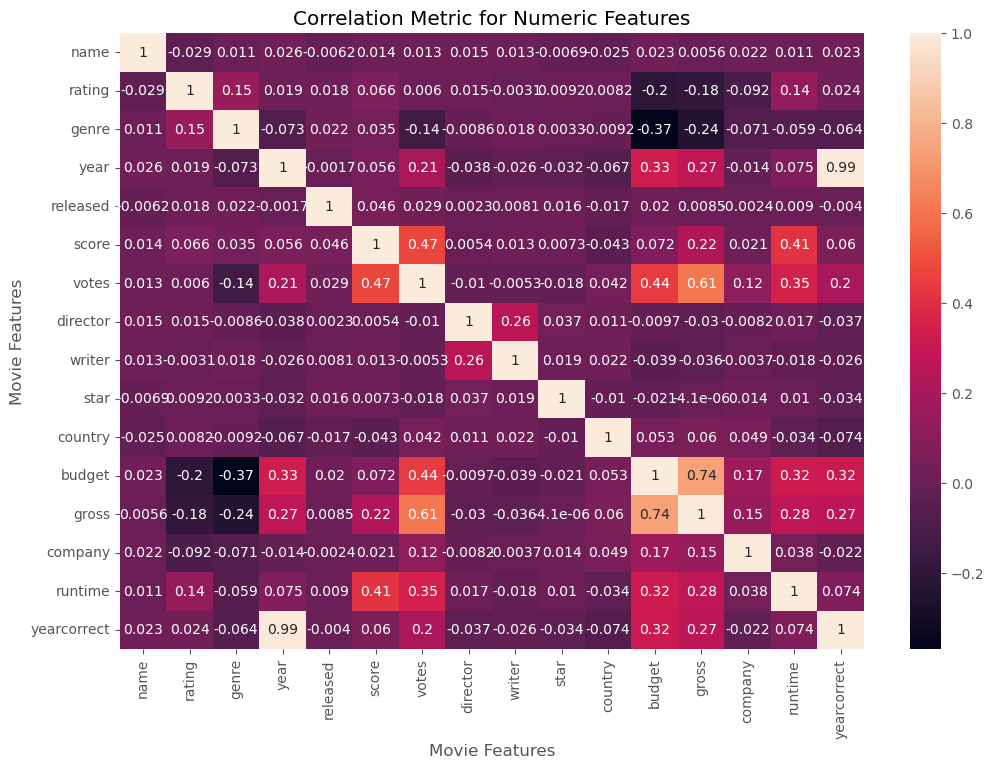

In [21]:
correlation_metrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_metrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
correlation_mat = df_numerized.corr()
corr_pairs =  correlation_mat.unstack()
print(corr_pairs)


name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.023234
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [23]:
sorted_pairs = corr_pairs.sort_values()
print(sorted_pairs)

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.074422
yearcorrect  country       -0.074422
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        yearcorrect   -0.064308
yearcorrect  genre         -0.064308
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
print(high_corr)

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.990417
year         yearcorrect    0.990417
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
# Votes and Budget has the highest correlation to Gross Earnings